<a href="https://colab.research.google.com/github/rahvlrawat/Spoiler-Alert/blob/main/Spoiler_Alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/Installations 

In [1]:
import os

In [2]:
os.system('pip install -q kaggle')
os.system('mkdir ~/.kaggle')
os.system('cp /content/drive/MyDrive/kaggle.json   ~/.kaggle/')
os.system('chmod 600 ~/.kaggle/kaggle.json')
os.system('kaggle datasets download -d  rmisra/imdb-spoiler-dataset')
os.system('kaggle datasets download -d   rtatman/glove-global-vectors-for-word-representation')




0

In [3]:
os.system('unzip  /content/imdb-spoiler-dataset.zip')

0

In [4]:
os.system('unzip /content/glove-global-vectors-for-word-representation.zip')

0

In [5]:
pip install --user -U nltk

     |████████████████████████████████| 1.4MB 8.8MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434677 sha256=388f65891530ee95b65b62ced97bf45deb402eed91fbef8d987e0d98e29b81d4
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import norm
from datetime import datetime
import re
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import svm
import re
import nltk
from nltk.corpus import stopwords
import pickle

# Data Preprocessing

In [7]:
df_reviews = pd.read_json('/content/IMDB_reviews.json', lines=True)
df_details = pd.read_json('/content/IMDB_movie_details.json', lines=True)


In [8]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [9]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [10]:
df_reviews.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating', 'review_summary'],
      dtype='object')

In [11]:
df_details.columns

Index(['movie_id', 'plot_summary', 'duration', 'genre', 'rating',
       'release_date', 'plot_synopsis'],
      dtype='object')

In [12]:
df=pd.merge(df_reviews,df_details,on='movie_id')

In [13]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'rating_x', 'review_summary', 'plot_summary', 'duration', 'genre',
       'rating_y', 'release_date', 'plot_synopsis'],
      dtype='object')

In [14]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating_x,review_summary,plot_summary,duration,genre,rating_y,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [15]:
df.rename(columns = {'rating_x':'userrating','rating_y':'actualrating'}, inplace = True)

In [16]:
df['is_spoiler']=df['is_spoiler']+0

In [17]:

#df["days_elapsed"]=abs(df["review_date"]-df["release_date"]).dt.days

In [18]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


# Exploratory Analysis
 


In [19]:
df.dtypes

review_date        object
movie_id           object
user_id            object
is_spoiler          int64
review_text        object
userrating          int64
review_summary     object
plot_summary       object
duration           object
genre              object
actualrating      float64
release_date       object
plot_synopsis      object
dtype: object

As can be seen from data both review date and review date are here as object dtype but to use it  will have to convert these into datetime format for proper analysis

In [20]:
df["review_date"]=pd.to_datetime(df["review_date"])
df["release_date"]=pd.to_datetime(df["release_date"])

In [21]:
df.dtypes

review_date       datetime64[ns]
movie_id                  object
user_id                   object
is_spoiler                 int64
review_text               object
userrating                 int64
review_summary            object
plot_summary              object
duration                  object
genre                     object
actualrating             float64
release_date      datetime64[ns]
plot_synopsis             object
dtype: object

In [22]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis
0,2006-02-10,tt0111161,ur1898687,1,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,2000-09-06,tt0111161,ur0842118,1,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2001-08-03,tt0111161,ur1285640,1,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,2002-09-01,tt0111161,ur1003471,1,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,2004-05-20,tt0111161,ur0226855,1,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


Let's check  if there are any underlying missing values in the dataset 

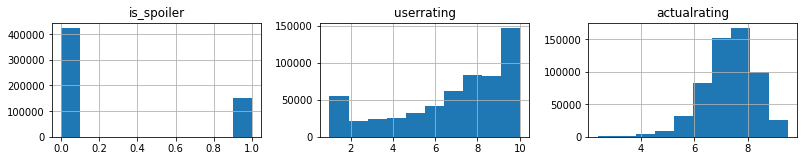

In [23]:
df.hist(layout=(5,4), figsize=(15,10))
plt.tight_layout()
plt.show()

Above graph shows distribution of data for the features such as userrating,actualrating and is_spoiler.

In [24]:
df=df[df.isna().any(axis=1)==False]

In [25]:
df.isnull().sum()

review_date       0
movie_id          0
user_id           0
is_spoiler        0
review_text       0
userrating        0
review_summary    0
plot_summary      0
duration          0
genre             0
actualrating      0
release_date      0
plot_synopsis     0
dtype: int64

In [26]:
print('Total no. of reviews:' , len(df))

Total no. of reviews: 573906


In [27]:
print("Total no. of users who gave reviews:",df['user_id'].nunique() )

Total no. of users who gave reviews: 263404


In [28]:
print('Total films in dataset :', df['movie_id'].nunique())

Total films in dataset : 1570


Now lets have a look at data heat map to see if the features bear any correlation wrt eachother 

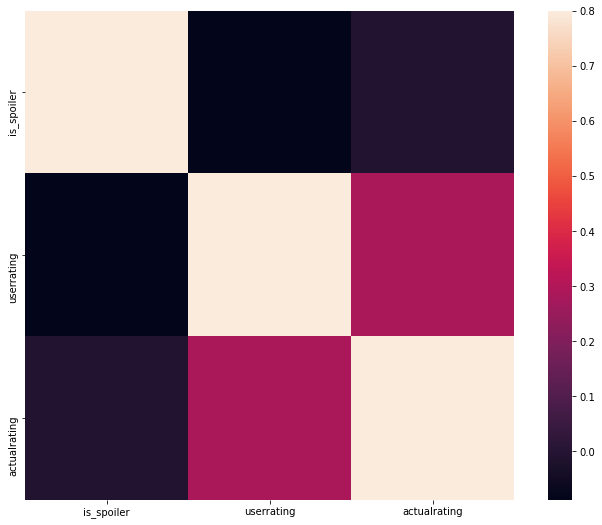

In [29]:
#correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

as can be see from the heatmap that wrt there us quite little correlationst amongst the features 

Lets have a look at distribution of movie's actual rating wrt the reviews containing spoilers and not containing spoilers

Distribution of rating across all movie reviews:


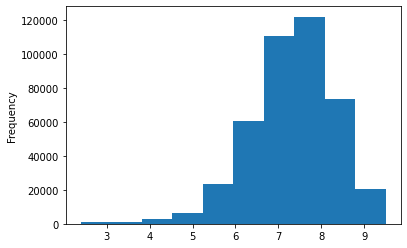

In [30]:
print("Distribution of rating across all movie reviews:")
df[df["is_spoiler"]==0]['actualrating'].plot(kind='hist')

Distribution of rating across  movie reviews with spoilers:


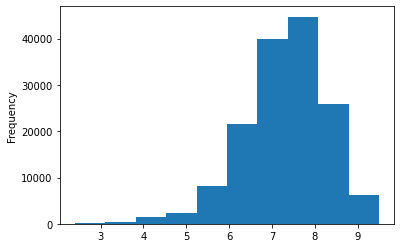

In [31]:
print("Distribution of rating across  movie reviews with spoilers:")
df[df["is_spoiler"]==1]['actualrating'].plot(kind='hist')

Most of the ratings are concentrated around 6-9  for both reviews either containing spoiler or not.

On similar grounds lets also try to find different insights into the data through some more visualisations 

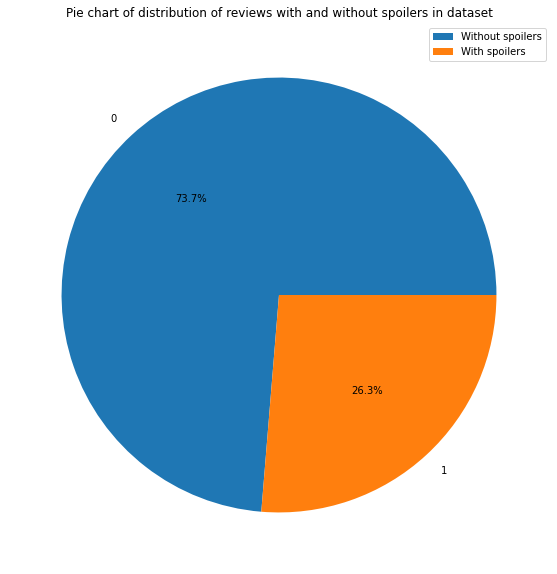

In [32]:
labels, frequencies = np.unique(df.is_spoiler.values,return_counts = True)
plt.figure(figsize = (10,10))
x=plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title('Pie chart of distribution of reviews with and without spoilers in dataset')
plt.legend(labels=['Without spoilers', 'With spoilers'])

About 70-30  ratio is there between non spoiler and spoiler reviews in the dataset 

Text(0.5, 1.0, 'Pie chart for reviews for top 10 genres:')

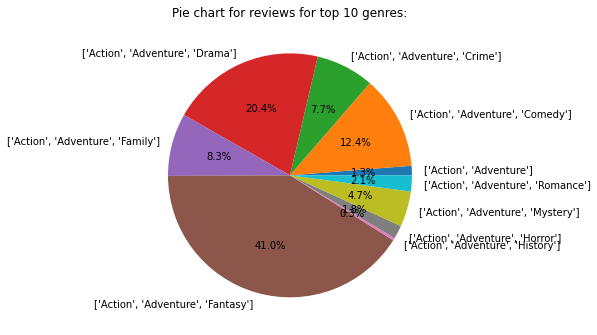

In [33]:
labels, frequencies = np.unique(df[df["is_spoiler"]==1].genre.values,return_counts = True)
plt.figure(figsize = (8,8))
x=plt.pie(frequencies[:10],labels = labels[:10], autopct = '%1.1f%%')
plt.tight_layout()
plt.title('Pie chart for reviews for top 10 genres:')

These are the top 10 genre sets with most spoiler reviews.This indicates that some movie genres have much more tendency to correspond with spoiler in the reviews than other genres.

In [34]:
df_temp=pd.DataFrame()
df_temp["is_spoiler"]=df["is_spoiler"]
df_temp["days_elapsed"]=abs(df["review_date"]-df["release_date"]).dt.days
df_temp=df_temp.groupby(['is_spoiler', 'days_elapsed']).size().reset_index(name='count').sort_values('days_elapsed')

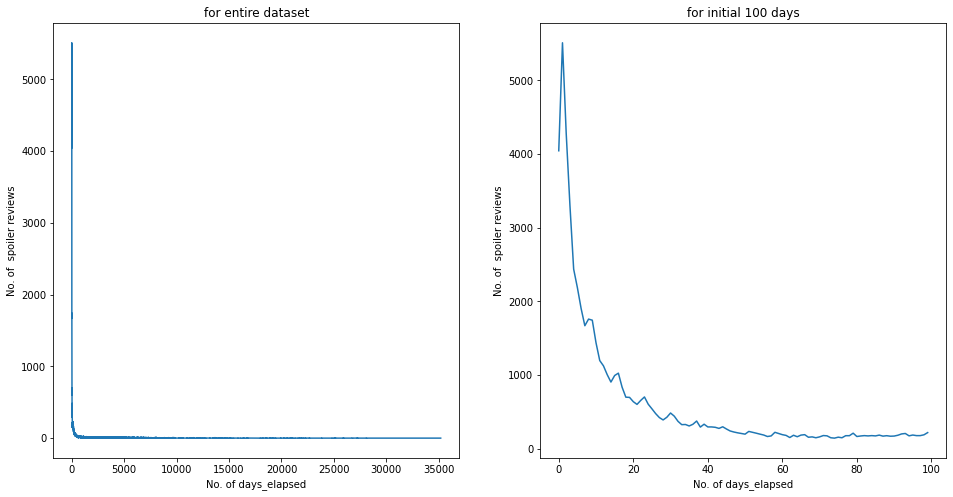

In [35]:
fig = plt.figure(figsize=(16, 8))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(df_temp[df_temp["is_spoiler"]==1]["days_elapsed"].values,df_temp[df_temp["is_spoiler"]==1]["count"].values)
ax1.set_title('for entire dataset')
ax1.set_xlabel('No. of days_elapsed')
ax1.set_ylabel('No. of  spoiler reviews')

ax2.plot(df_temp[df_temp["is_spoiler"]==1]["days_elapsed"][:100].values,df_temp[df_temp["is_spoiler"]==1]["count"][:100].values)
ax2.set_xlabel('No. of days_elapsed')
ax2.set_title('for initial 100 days')
ax2.set_ylabel('No. of  spoiler reviews')

plt.show()

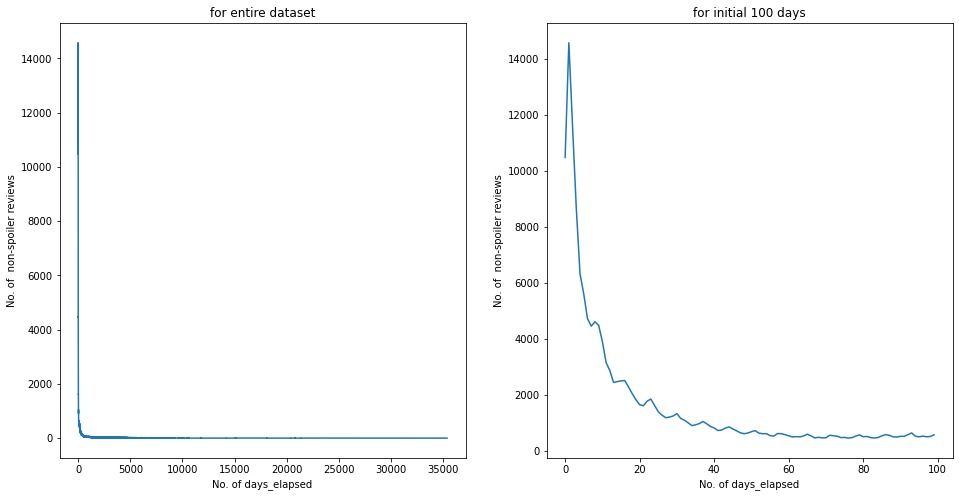

In [36]:
fig = plt.figure(figsize=(16, 8))


ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(df_temp[df_temp["is_spoiler"]==0]["days_elapsed"].values,df_temp[df_temp["is_spoiler"]==0]["count"].values)
ax1.set_title('for entire dataset')
ax1.set_xlabel('No. of days_elapsed')
ax1.set_ylabel('No. of  non-spoiler reviews')

ax2.plot(df_temp[df_temp["is_spoiler"]==0]["days_elapsed"][:100].values,df_temp[df_temp["is_spoiler"]==0]["count"][:100].values)
ax2.set_xlabel('No. of days_elapsed')
ax2.set_title('for initial 100 days')
ax2.set_ylabel('No. of  non-spoiler reviews')

plt.show()

In [37]:
df["days_elapsed"]=abs(df["review_date"]-df["release_date"]).dt.days

Above graphs clearly shows most reviews for a movie are around the time of the release of the movie and as it  moves away from the release date after some days the review logging for the respective movie also depreciates.Same trend can be seen for the reviews with spoilers.Thus it can be deducted that the days_elapsed has no partiular influence on the reviewer giving spoilers as  when there are more spoilers naturally more spoilers will follow.

In [38]:
spoilermovies=df[df['is_spoiler']==1].movie_id.value_counts()[:20].index.to_list()
pivot_df=df.groupby(['is_spoiler', 'movie_id']).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df[pivot_df["movie_id"].isin(spoilermovies)]
pivot_df=pivot_df.pivot(index='movie_id',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)

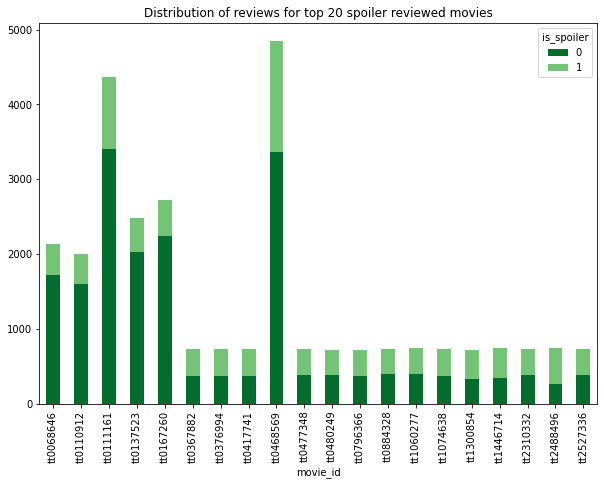

In [39]:
colors = ["#006D2C","#74C476"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7),title="Distribution of reviews for top 20 spoiler reviewed movies")


Based on graph it can be seen that some movies have more chances  of having spoiler reviews when compared with others.

In [40]:
spoilermovies=df[df['is_spoiler']==1].user_id.value_counts()[:20].index.to_list()
pivot_df=df.groupby(['is_spoiler', 'user_id']).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df[pivot_df["user_id"].isin(spoilermovies)]
pivot_df=pivot_df.pivot(index='user_id',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)

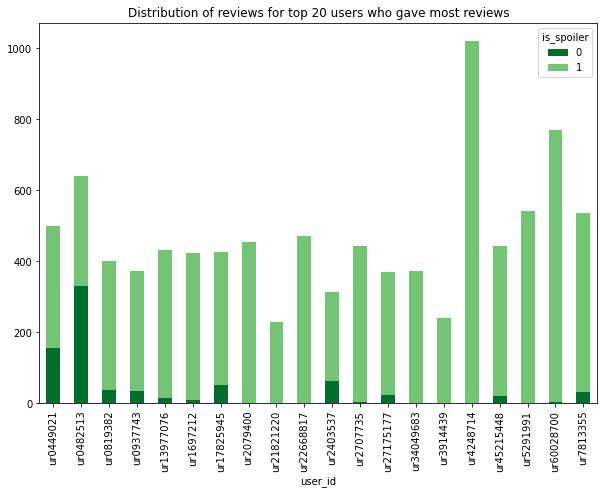

In [41]:
colors = ["#006D2C","#74C476"]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7),title="Distribution of reviews for top 20 users who gave most reviews")

As can be seen from the above graphs most of the top users have mostly given more spoiler reviews when compared to non spoiler ones.
This indicates that some users are more likely to give spoiler reviews than others.

In [42]:
df.groupby(['movie_id']).size().reset_index(name='count').sort_values('count')

,movie_id,count
676,tt0201265,4
1566,tt6294822,11
299,tt0107719,12
1567,tt6868216,13
167,tt0101301,15
...,...,...
68,tt0068646,2137
597,tt0137523,2480
639,tt0167260,2729
359,tt0111161,4361


As can be seen from the above data some movie have much more reviews than other movies which is  a good indicator of popularity of the movie.

In [43]:
df_temp2=pd.DataFrame()
df_temp2['word_count'] = df['review_text'].apply(lambda text: len(text.split(' ')))
df_temp2["is_spoiler"]=df.is_spoiler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


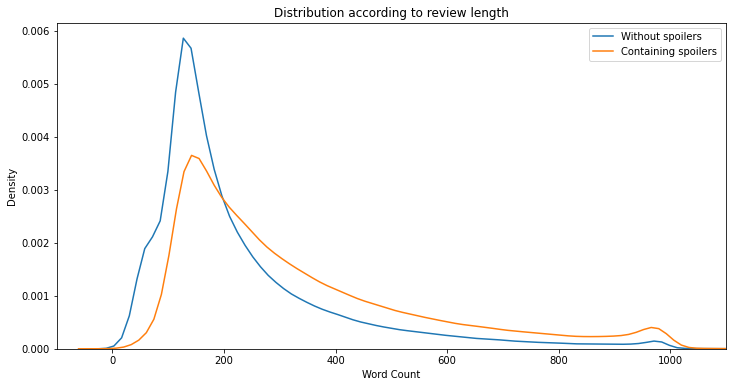

In [44]:
plt.figure(figsize=(12, 6))
sns.distplot(df_temp2[df_temp2['is_spoiler'] == False]['word_count'], hist=False, label='Without spoilers')
sns.distplot(df_temp2[df_temp2['is_spoiler'] == True]['word_count'], hist=False, label='Containing spoilers')
plt.legend()
plt.xlim([-100, 1100])
plt.xlabel('Word Count')
plt.title('Distribution according to review length')
plt.show()

This clearly indicates that word count for reviews containing spoilers are mostly larger as compared to non-spoiler reviews

In [45]:
df["word_count"]=df['review_text'].apply(lambda text: len(text.split(' ')))

In [46]:
df_temp2["review_text"]=df["review_text"].str.lower()

In [47]:
df_temp2["spoiltext"]=df_temp2.review_text.str.contains("spoiler")+0

In [48]:
df_temp2.review_text.str.contains("dies").value_counts()

False    539582
True      34324
Name: review_text, dtype: int64

In [49]:
df_temp2["spoiltext"].value_counts()

0    547470
1     26436
Name: spoiltext, dtype: int64

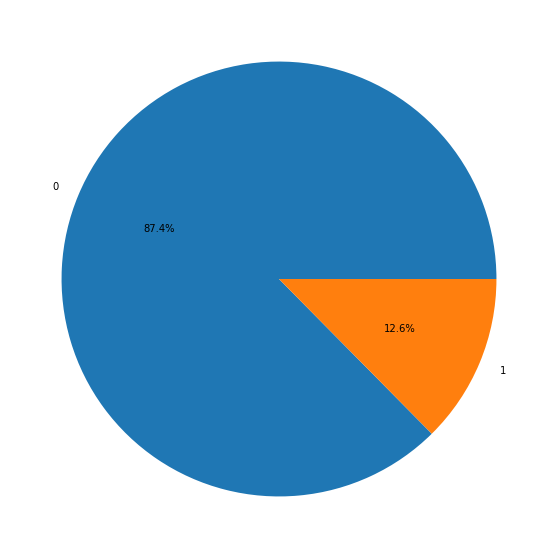

In [50]:
labels, frequencies = np.unique(df_temp2[df_temp2["is_spoiler"]==1].spoiltext.values,return_counts = True)
plt.figure(figsize = (10,10))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.show()

While the ratio itself isn't much appreciable but this can be a great criteria along with some other words that all spoiler reviews may contain frequently.

In [51]:
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))
stopwords_dict=Counter(stopwords)
def preprocesstext(review):
    review=review.lower()
    review=re.sub('[^a-zA-Z]',' ',review)
    words=review.split()
    word=[word for word in words if word not in stopwords_dict]
    review=" ".join(words)
    return review
df_temp2.review_text=df_temp2.review_text.apply(preprocesstext)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
df_temp2.review_text

0         in its oscar year shawshank redemption written...
1         the shawshank redemption is without a doubt on...
2         i believe that this film is the best story eve...
3         yes there are spoilers here this film has had ...
4         at the heart of this extraordinary movie is a ...
                                ...                        
573901    go is wise fast and pure entertainment assembl...
573902    well what shall i say this one s fun at any ra...
573903    go is the best movie i have ever seen and i ve...
573904    call this teenage version of pulp fiction what...
573905    why was this movie made no doubt to sucker in ...
Name: review_text, Length: 573906, dtype: object

In [53]:
Counter(" ".join(df_temp2["review_text"][:200000]).split()).most_common(100)

[('the', 3290656),
 ('and', 1630399),
 ('a', 1436389),
 ('of', 1396191),
 ('to', 1276042),
 ('is', 1074861),
 ('it', 944538),
 ('i', 870044),
 ('in', 859430),
 ('that', 722125),
 ('this', 659288),
 ('s', 578380),
 ('movie', 488797),
 ('as', 445589),
 ('was', 443013),
 ('for', 421420),
 ('with', 417172),
 ('film', 414228),
 ('but', 406147),
 ('you', 350253),
 ('t', 312710),
 ('he', 309249),
 ('his', 306074),
 ('not', 303358),
 ('on', 283273),
 ('are', 274044),
 ('be', 260485),
 ('have', 251552),
 ('one', 248405),
 ('all', 244810),
 ('by', 206330),
 ('so', 204752),
 ('an', 201187),
 ('they', 193822),
 ('at', 193309),
 ('from', 193055),
 ('like', 188745),
 ('who', 173455),
 ('just', 173119),
 ('there', 173084),
 ('has', 169106),
 ('about', 165141),
 ('what', 162790),
 ('or', 153832),
 ('more', 153512),
 ('story', 151195),
 ('out', 144622),
 ('can', 144301),
 ('if', 143798),
 ('good', 139417),
 ('time', 137801),
 ('my', 132057),
 ('some', 130704),
 ('very', 130564),
 ('when', 129316),
 ('m

In [54]:
df["spoiltext"]=df.review_text.str.contains("spoiler")+0

Opposed to the intution the most common words as  can be seen bear no semantic role towards indicating a spoiler.Despite of this i think if "spoiler" word is present in the review than its very likely to be a spoiler review.

In [55]:
df_temp2=pd.DataFrame()

In [56]:
df_temp2["year"]=df["review_date"].dt.year
df_temp2["is_spoiler"]=df["is_spoiler"]

In [57]:
pivot_df=df_temp2.groupby(["year","is_spoiler"]).size().reset_index(name='count').sort_values('count')
pivot_df=pivot_df.pivot(index='year',  columns='is_spoiler', values='count')
pivot_df=pivot_df.fillna(0)[:-1]

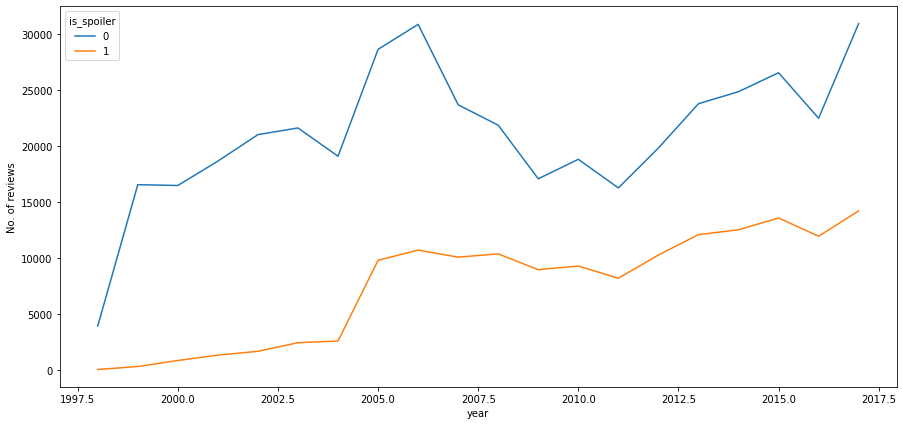

In [58]:
pivot_df.plot(ylabel="No. of reviews",figsize=(15,7))

Nothing could make it more clear than this graph on why we need this project.Over the years with the accessebility to give reviews the trend of spoiler reviews has only increased and to keep the review sections spoil-free  for the users it is important to come up with a good tool to curb this as much as possible.

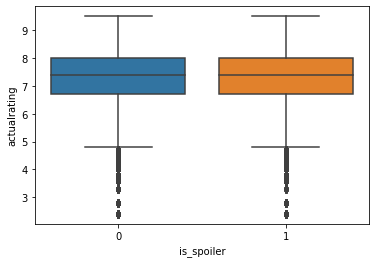

In [59]:
  
sns.boxplot(x= df.is_spoiler,y=df.actualrating)

Almost the same  actualrating  data  variance for both kind of reviews .

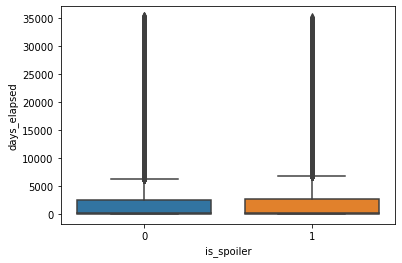

In [60]:
sns.boxplot(x= df.is_spoiler,y=df.days_elapsed)

Clearly days_elapsed also have same kind of data dispersion for both cases but in this case there are a lot of outliers.

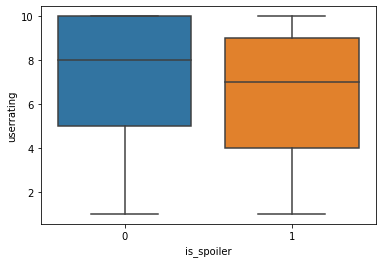

In [61]:
sns.boxplot(x= df.is_spoiler,y=df.userrating)

User ratings for ratings with spoiler reviews are somewhat lower  overall as compared with without spoilers.

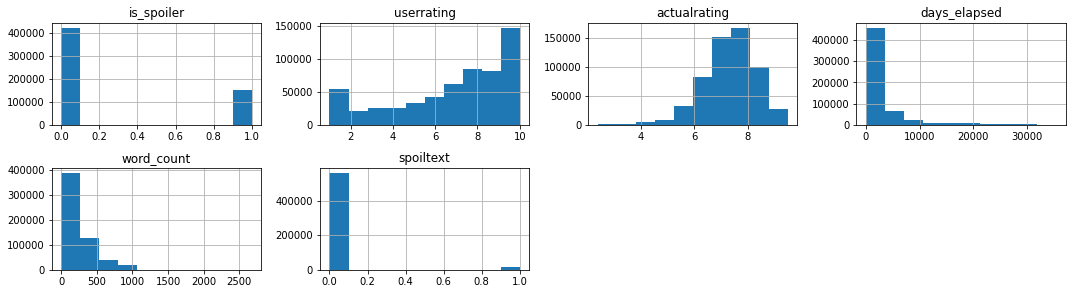

In [62]:
df.hist(layout=(5,4), figsize=(15,10),)
plt.tight_layout()
plt.show()

Above fig helps in understanding the disrtibution of various features in the dataset where some new features have been added to help in the predictions.

In [63]:
df.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'userrating', 'review_summary', 'plot_summary', 'duration', 'genre',
       'actualrating', 'release_date', 'plot_synopsis', 'days_elapsed',
       'word_count', 'spoiltext'],
      dtype='object')

After exploratory analysis  some key insights were gained which are as following:-


*   Some users,movies and genres have greater chances of containing reviews with spoilers so to exploit this  can create parameter corresponding each feature mentioned above where  assign every movie,user,genre pool a certain ratio attributing to its affinity for spoilers

*  Some spoilers will clearly contain the word "spoiler" indicative of it containing the spoilers so will assign a feature which tells us if review text for respective row contains the word "spoiler" or not 

*   The period  b/w review_date and release_date doesn't seem to be having any difference for spoiler and non spoiler reviews as evident from respective boxplot however it also holds information and might be helpful so will later try to make predictions both with and without it and compare the results

*   Can  also exploit the word count of reviews as a feature for the predictions 

* As can be observed  both review and corresponding plot summary so 
another good indicator for spoilers will be how close a review is to its plot synopsis 








# Movie spoiler ratio(MSR)

For every movie  will compare its no. of reviews with spoilers to total no. of reviews for the movie  and assign this ratio as ***Movie spoiler ratio  aka msr***

In [64]:
total_spoilers= df.groupby(by='movie_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_spoilers'})

In [65]:
total_movies = df.groupby(by='movie_id').movie_id.agg(['count']).reset_index().rename(columns={'count':'total_movies'})

In [66]:
msr = pd.merge(total_spoilers,total_movies, on='movie_id')

In [67]:
msr['msr']=msr.total_spoilers/msr.total_movies

In [68]:
msr.head()

,movie_id,total_spoilers,total_movies,msr
0,tt0012349,26,104,0.250000
1,tt0015864,39,128,0.304688
2,tt0017136,73,337,0.216617
3,tt0017925,50,192,0.260417
4,tt0018455,63,178,0.353933


In [69]:
msr.drop(['total_spoilers','total_movies'], axis=1, inplace=True)

In [70]:
df=pd.merge(df,msr,on='movie_id')

#User Spoiler Ratio (USR)

For every user  will compare its no. of reviews with spoilers to total no. of reviews from the user and assign this ratio as ***User spoiler ratio  aka  usr***

In [71]:
total_user_spoilers = df.groupby(by='user_id').is_spoiler.agg(['sum']).reset_index().rename(columns={'sum':'total_user_spoilers'})


In [72]:
total_users = df.groupby(by='user_id').user_id.agg(['count']).reset_index().rename(columns={'count':'total_users'})


In [73]:
usr = pd.merge(total_user_spoilers,total_users, on='user_id')

In [74]:
usr['usr']=usr.total_user_spoilers / usr.total_users

In [75]:
usr.drop(['total_user_spoilers','total_users'], axis=1,inplace=True)

In [76]:
df= pd.merge(df, usr, on='user_id')

# Genre Analysis

<h2>For differenet genres there will be diffrent likelihood of having spoilers so i'll assign ratio similar to the way of USR and MSR for each genre category </h2>

In [77]:
genres= np.unique(np.array(' '.join(df.genre.str.join(' ')).split()))

In [78]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [79]:
genre_df=pd.DataFrame()

In [80]:
for i in genres:
    genre_df[i.lower()]=0

In [81]:
for i,data in df_details.iterrows():
    #Assigns details pertaining to a movie to a variable
    details=df_details[df_details.movie_id==data['movie_id']]
    genre_df.at[i,'movie_id']=data['movie_id']
    for genre in genres:
        #Checks if movie belongs to the genre or not 
        genre_df.at[i,genre.lower()]=int(genre in details['genre'].tolist()[0])

In [82]:
genre_df.head()

,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,movie_id
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,tt0105112
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,tt1204975
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,tt0243655
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,tt0040897
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,tt0126886


In [83]:
df_temp= pd.merge(df, genre_df, on="movie_id")

In [84]:
np.zeros(len(genres))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [85]:
e = 0.001
gsr = np.zeros(len(genres))
for i,g in enumerate(genres):
    # i.e. total no. of reviews with spoiler belonging to a genre /total no. of reviews of movie genre
    gsr[i] = df_temp[(df_temp.is_spoiler==1) &
                                     (df_temp[g.lower()]==1)].shape[0] / (df_temp[df_temp[g.lower()]==1].shape[0]
                                                                          +e)

In [86]:
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'], dtype='<U9')

In [87]:
gsr

array([0.28260197, 0.28689807, 0.25694626, 0.24139909, 0.2156022 ,
       0.24629342, 0.25653166, 0.27053262, 0.28138213, 0.27247333,
       0.23578351, 0.29666125, 0.20991318, 0.20297205, 0.28947245,
       0.23652655, 0.31211931, 0.23998089, 0.28114596, 0.24305825,
       0.25500944])

In [88]:
genre_ratio=dict(zip(genres,gsr))

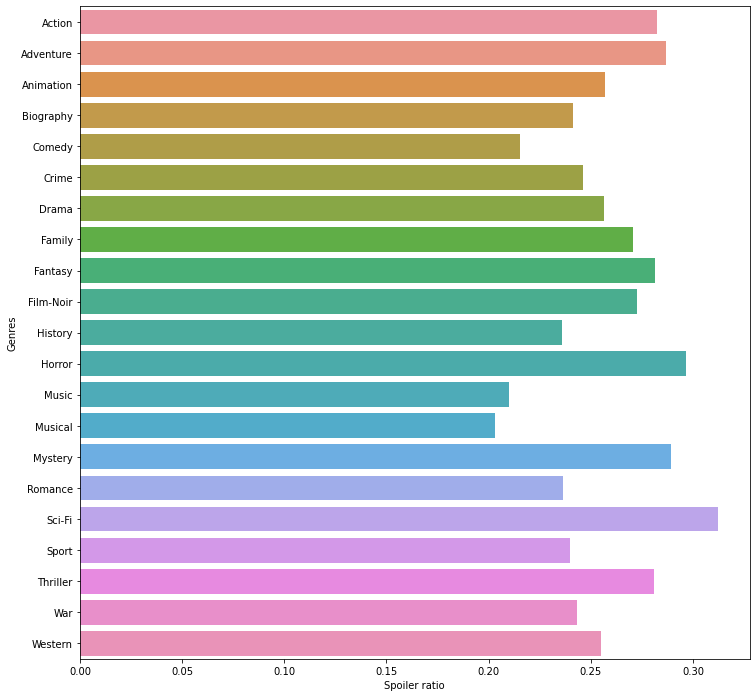

In [89]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=gsr,y=genres)
ax.set(xlabel="Spoiler ratio",ylabel="Genres");
plt.show();

In [90]:
def genrespoilerratio(list):
  value=0
  for i in list:
     value+=genre_ratio[i]
  return value   

In [91]:
df['gsr'] = pd.merge(df,df_details.drop(['genre'],axis=1),on="movie_id").genre.apply(genrespoilerratio)

#  Matching Text from reviews with plot summary

 will find distance between plot summary and  the corresponding reviews.Lesser the distance more is the probability of them containing same information i.e. spoilers . So in order to do this  will first preprocess the text to remove all non alphabetical characters and stop words from the review_text and plot summary and then using glove embeddings will filnd distance between them .

In [92]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
stopwords=set(stopwords.words('english'))

In [94]:
stopwords_dict=Counter(stopwords)

In [95]:
def preprocesstext(text):
    text=text.lower()
    text=re.sub('[^a-zA-Z]',' ',text)
    words=text.split()
    word=[word for word in words if word not in stopwords_dict]
    text=" ".join(words)
    return text

In [96]:
df.review_text=df.review_text.apply(preprocesstext)
df.plot_summary=df.plot_summary.apply(preprocesstext)

Using glove-global-vectors for words.These pre-trained embeddings are used  to quantify word co-occurrence (which also captures some aspects of word meaning). This dataset contains 50-dimensional, 100-dimensional and 200-dimensional pre trained word vectors.Here i'll be using 50 dimensional one.

In [97]:
#Saving the words and their corresponding vectors in  a dictionary
embeddings=dict()
f=open('/content/glove.6B.50d.txt')
for i in f: 
    values=i.split()
    word=values[0]
    cofss = np.asarray(values[1:], dtype='float32')
    embeddings[word]=cofss
f.close()    

In [98]:
def getAvgWordEmbedding(text):
    words = text.split()
    n = 0
    sumEmbed = np.zeros(50)
    # because 50 dim of word vectors
    
    for word in words:
        if word in embeddings:
            sumEmbed += embeddings[word]
            n += 1
    
    avgEmbed = sumEmbed / n
    return avgEmbed
    
def Dist(e1, e2):
    return np.sum(np.square(e1-e2), axis = 1)

In [99]:
plot_embed = df.plot_summary.apply(getAvgWordEmbedding)
review_embed = df.review_text.apply(getAvgWordEmbedding)

In [100]:
distance=Dist(np.stack(review_embed),np.stack(plot_embed))

In [101]:
df['distance']=distance

# Saving the processed dataset for future use


In [102]:
df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,word_count,spoiltext,msr,usr,gsr,distance
0,2006-02-10,tt0111161,ur1898687,1,in its oscar year shawshank redemption written...,10,A classic piece of unforgettable film-making.,chronicles the experiences of a formerly succe...,2h 22min,"[Crime, Drama]",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,843,0,0.219216,0.6,0.502825,0.670662
1,2006-03-19,tt0144084,ur1898687,0,starring christian bale willem dafoe chlo sevi...,8,"Worth seeing, if only for the post-viewing dis...",patrick bateman is handsome well educated and ...,1h 42min,"[Crime, Drama]",7.6,2000-04-14,A white background. Red drops begin to fall pa...,2165,526,0,0.274725,0.6,0.502825,0.529877
2,2006-02-10,tt0298203,ur1898687,1,eminem s semi autobiographical rap movie do i ...,7,Better than it needed to be.,this is the inspiring captivating story of the...,1h 50min,"[Drama, Music]",7.1,2002-11-08,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",1190,467,0,0.164456,0.6,0.502825,0.287624
3,2006-02-10,tt0319061,ur1898687,0,the grass is so green the sky is so blue spect...,9,An immediate classic that works on both a visu...,united press international journalist will blo...,2h 5min,"[Adventure, Drama, Fantasy]",8.0,2004-01-09,"Edward Bloom (Albert Finney), a charismatic te...",763,320,0,0.158416,0.6,0.502825,0.636278
4,2006-02-10,tt0377092,ur1898687,1,there are a few signs heading into mean girls ...,7,"A smart, but flawed, look at high school life",her parents being zoologists homeschooled cady...,1h 37min,[Comedy],7.0,2004-04-30,Cady (Lindsay Lohan) is the 16-year-old home-s...,651,438,0,0.222472,0.6,0.502825,0.392562


In [103]:
#df.to_csv('/content/drive/MyDrive/Spoiler_alert_model/processed_data/processed_data.csv',index=False)

#Preparing  Triain / Valid / Test Sets


In [104]:
spoilers = df[df.is_spoiler == 1].sample(frac=1).reset_index(drop=True)
notspoilers = df[df.is_spoiler == 0].sample(frac=1).reset_index(drop=True)

In [105]:
len(spoilers),len(notspoilers)

(25924, 297982)

In [106]:
# train set
train = pd.concat([spoilers.head(125000), notspoilers.head(125000)]).sample(frac=1).reset_index(drop=True)

# test set
test = pd.concat([spoilers.tail(25000), notspoilers.tail(25000)]).sample(frac=1).reset_index(drop=True)

In [107]:
train.columns

Index(['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review_text',
       'userrating', 'review_summary', 'plot_summary', 'duration', 'genre',
       'actualrating', 'release_date', 'plot_synopsis', 'days_elapsed',
       'word_count', 'spoiltext', 'msr', 'usr', 'gsr', 'distance'],
      dtype='object')

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
columns=['actualrating','days_elapsed','word_count','spoiltext','usr','msr','gsr','distance']

In [110]:
x_train = train[columns].fillna(0)
x_train=StandardScaler().fit_transform(x_train)
y_train=train['is_spoiler'].values

In [111]:
x_test = test[columns].fillna(0)
x_test = StandardScaler().fit_transform(x_test)
y_test=test['is_spoiler'].values

# Logistic Regression 

In [112]:
logistic= LogisticRegression() 
logistic.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
logisticpredstest=logistic.predict(x_test)

In [114]:
print(logistic.score(x_test, y_test))

0.91016


In [115]:
mean_squared_error(logisticpredstest, y_test)

0.08984

In [116]:
print('AUC: ', roc_auc_score(y_test, logisticpredstest))


AUC:  0.9101600000000001


In [117]:
print(classification_report(y_test, logisticpredstest))
print(confusion_matrix(y_test, logisticpredstest))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     25000
           1       0.92      0.90      0.91     25000

    accuracy                           0.91     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.91      0.91      0.91     50000

[[23124  1876]
 [ 2616 22384]]


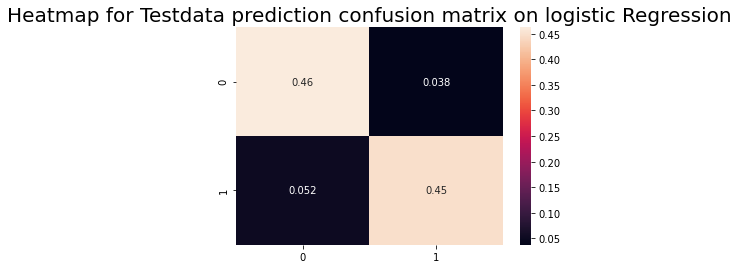

In [118]:
plt.title("Heatmap for Testdata prediction confusion matrix on logistic Regression", fontsize =20)
sns.heatmap(confusion_matrix(y_test, logisticpredstest)/np.sum(confusion_matrix(y_test, logisticpredstest)), annot=True)

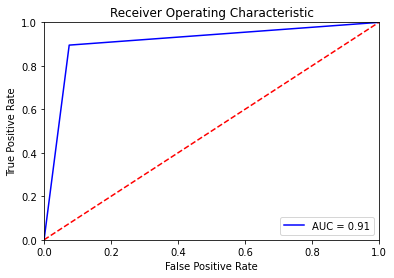

In [119]:
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, logisticpredstest)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

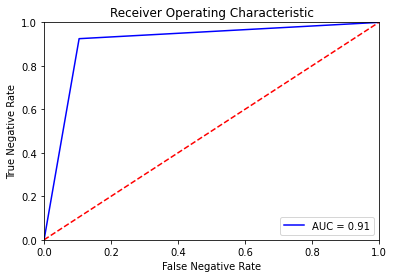

In [120]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

# Random Forest 

In [121]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [122]:
print(logistic.score(x_test, y_test))

0.91016


In [123]:
mean_squared_error(predictions, y_test)

0.0844

In [124]:
predictions = model.predict(x_test)
print('AUC: ', roc_auc_score(y_test, predictions))


AUC:  0.9156


In [125]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     25000
           1       0.91      0.93      0.92     25000

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000

[[22650  2350]
 [ 1870 23130]]


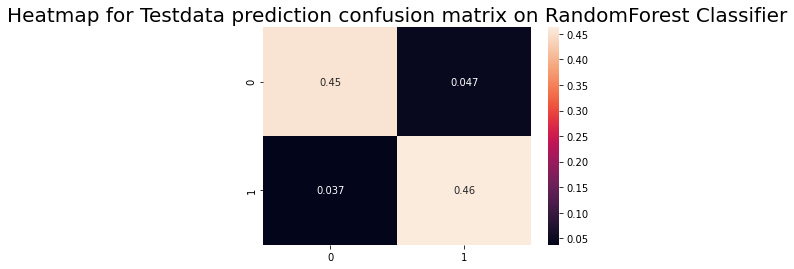

In [126]:
plt.title("Heatmap for Testdata prediction confusion matrix on RandomForest Classifier", fontsize =20)
sns.heatmap(confusion_matrix(y_test, predictions)/np.sum(confusion_matrix(y_test, predictions)), annot=True)

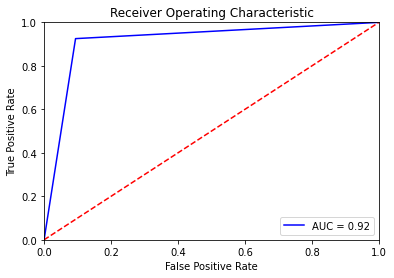

In [127]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

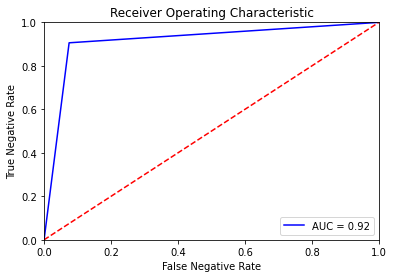

In [128]:
roc_auc = metrics.auc(1-tpr, 1-fpr)
plt.title('Receiver Operating Characteristic')
plt.plot(1-tpr,1-fpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Negative Rate')
plt.show()

# Conclusion 

When comparing these evaluation matrices with that if logistic regression results it can be clearly seen that random forest classifier has given us slightly better recall as well as for other metrics too wrt our target class of spoiler containing text and thus in my opinion this is better model.Here evaluation metrics for our model was chosen to be "**AUC-ROC metric "**  as we want to maximise the spoilers caught along with high confidence on the predictions.For deployment **AUC-ROC metric**  makes perfect sense as it  makes sure that we are able to get  a balance of both accuracy and precision metric.  While with only high **recall**  inclusion of more non spoiler reviews as containing spoilers can lead to bad user experience e.g. if large no. of reviews made without spoilers  are classified as containing spoilers and collapsed this can lead to people being unhappy about this issue and decide to leave the platform, in similar way having only high **accuracy** can lead to many potential spoilers going unnoticed thus open for view by readers and spoiling their movies .**AUC-ROC metric** on the other hand kinda balances these out to give us balance point where we can best of both metrics without hampering much performance in either department. 

# Saving and Loading the Model 

In [302]:
filename1 = '/content/drive/MyDrive/Spoiler_alert_model/Spoiler_alert_logistic.sav'
filename2 = '/content/drive/MyDrive/Spoiler_alert_model/Spoiler_alert_randomforest.sav'



In [303]:
pickle.dump(logistic, open(filename1, 'wb'))
pickle.dump(model, open(filename2, 'wb'))

In [ ]:
 
# load the model from disk
loaded_model_logistic= pickle.load(open(filename1, 'rb'))
loaded_model_randomforest= pickle.load(open(filename2, 'rb'))


In [ ]:
datasaved=pd.read_csv('/content/drive/MyDrive/Spoiler_alert_model/processed_data/processed_data.csv')

In [ ]:
datasaved.head()

,review_date,movie_id,user_id,is_spoiler,review_text,userrating,review_summary,plot_summary,duration,genre,actualrating,release_date,plot_synopsis,days_elapsed,msr,usr,gsr,spoiltext,distance
0,2006-02-10,tt0111161,ur1898687,1,in its oscar year shawshank redemption written...,10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,"['Crime', 'Drama']",9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker...",4137,0.219216,0.6,0,0,0.818162
1,2006-03-19,tt0144084,ur1898687,0,starring christian bale willem dafoe chlo sevi...,8,"Worth seeing, if only for the post-viewing dis...","Patrick Bateman is handsome, well educated and...",1h 42min,"['Crime', 'Drama']",7.6,2000-04-14,A white background. Red drops begin to fall pa...,2165,0.274725,0.6,0,0,0.800012
2,2006-02-10,tt0298203,ur1898687,1,eminem s semi autobiographical rap movie do i ...,7,Better than it needed to be.,This is the inspiring captivating story of the...,1h 50min,"['Drama', 'Music']",7.1,2002-11-08,"It's 1995. Jimmy ""B-Rabbit"" Smith Jr. (Eminem)...",1190,0.164456,0.6,0,0,0.440089
3,2006-02-10,tt0319061,ur1898687,0,the grass is so green the sky is so blue spect...,9,An immediate classic that works on both a visu...,United Press International journalist Will Blo...,2h 5min,"['Adventure', 'Drama', 'Fantasy']",8.0,2004-01-09,"Edward Bloom (Albert Finney), a charismatic te...",763,0.158416,0.6,0,0,0.883154
4,2006-02-10,tt0377092,ur1898687,1,there are a few signs heading into mean girls ...,7,"A smart, but flawed, look at high school life","Her parents being zoologists, homeschooled Cad...",1h 37min,['Comedy'],7.0,2004-04-30,Cady (Lindsay Lohan) is the 16-year-old home-s...,651,0.222472,0.6,0,0,0.357090


In [ ]:
testdata=datasaved[['msr','usr','gsr','distance','spoiltext','actualrating'] ].values

In [ ]:
testy=datasaved[['is_spoiler']].values

In [ ]:
lrpred=loaded_model_logistic.predict(testdata)
rfpred=loaded_model_randomforest.predict(testdata)

In [ ]:
resultlogistic = loaded_model_logistic.score(testdata, testy)
print(resultlogistic)

0.9178348332912242


In [ ]:
mean_squared_error(lrpred, testy)

0.08216516670877584

In [ ]:
roc_auc_score(testy,lrpred)


0.9095324339450882

In [ ]:
resultrf = loaded_model_randomforest.score(testdata, testy)
print(resultrf)

0.9130309023270402


In [ ]:
mean_squared_error(rfpred, testy)

0.08696909767295981

In [ ]:
roc_auc_score(testy, rfpred)


0.9205756171555233

# Appendix


for application main columns needed are   [userid,movieid,review_text,userrating,actualrating,plot_synopsis]
rest all columns such as [msr,usr,gsr,spoiltext,distance]  are then  build from this existing info  using  code given below  in a modified manner
and then finally ['msr','usr','gsr','distance','spoiltext','actualrating'] these cols are passed to model for getting a prediction 

In [ ]:
#If used train_test_split earlier for randomly sampled data from entire dataset add these pramas just as we did while training

# test0 = pd.merge(test, usr, how = 'left', on = 'user_id')
# test0 = pd.merge(test0, msr, how = 'left', on = 'movie_id')
# test0['gsr'] = test0.genre.apply(getGenreRatio)+0
# test0.review_text = test0.review_text.apply(preprocesstext)
# review_embed_test = test.review_text.apply(getAvgWordEmbedding)
# plot_embed_test = test.plot_summary.apply(getAvgWordEmbedding)
# test0['distance'] = Dist(np.stack(review_embed_test), np.stack(plot_embed_test))
#test0['spoiltext'] = test0.review_summary.str.contains('SPOILERS')+0